# Advanced data analysis and machine learning

Project work by Radomír Bábek, Jakub Ryšánek and Vojtěch Vondráček


## Task 1: Understaning the data



In [123]:
from posixpath import sep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

Loading the train_FD001 dataset into Pandas DataFrame

In [ ]:
# Read data from the first part
names = [
    "unit number",
	"time, in cycles",
	"operational setting 1",
	"operational setting 2",
	"operational setting 3"
    ]

sen_measurements = [f"sensor measurement {i}" for i in range(1, 22)]

names = names + sen_measurements

data = pd.read_csv('./NASA-Turbofan-data/data/train_FD001.txt', delim_whitespace=True, names=names)
data.info()

display(data)

# Get count, Nan count
string_stats = data.describe()
nan_count = data.isna().sum()
string_stats.loc['NaN count'] = nan_count
display(string_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41214 entries, 0 to 41213
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit number            41214 non-null  int64  
 1   time, in cycles        41214 non-null  int64  
 2   operational setting 1  41214 non-null  float64
 3   operational setting 2  41214 non-null  float64
 4   operational setting 3  41214 non-null  float64
 5   sensor measurement 1   41214 non-null  float64
 6   sensor measurement 2   41214 non-null  float64
 7   sensor measurement 3   41214 non-null  float64
 8   sensor measurement 4   41214 non-null  float64
 9   sensor measurement 5   41214 non-null  float64
 10  sensor measurement 6   41214 non-null  float64
 11  sensor measurement 7   41214 non-null  float64
 12  sensor measurement 8   41214 non-null  float64
 13  sensor measurement 9   41214 non-null  float64
 14  sensor measurement 10  41214 non-null  float64
 15  se

/var/folders/0r/_sk4sybx66q8hvt1f_qvjv1w0000gn/T/ipykernel_81783/1010412124.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('./NASA-Turbofan-data/data/test_FD004.txt', delim_whitespace=True, names=names)


,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
count,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,...,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000,41214.000000
mean,120.006017,108.739094,24.115207,0.574725,94.072888,472.711616,579.069264,1414.951596,1197.321054,8.003346,...,265.414280,2334.733335,8063.206813,9.284664,0.023029,346.976319,2228.560392,97.766960,20.798613,12.479669
std,71.685208,83.717459,14.714512,0.308868,14.211218,26.321455,37.129671,105.423125,118.206367,3.602107,...,137.477066,127.827832,84.126742,0.744338,0.004595,27.604875,144.868684,5.354077,9.880486,5.928765
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.420000,1240.940000,1024.900000,3.910000,...,128.260000,2027.740000,7849.800000,8.204000,0.020000,302.000000,1915.000000,84.930000,10.190000,6.145300
25%,57.000000,43.000000,10.004700,0.250700,100.000000,445.000000,549.200000,1348.590000,1116.800000,3.910000,...,132.900000,2387.890000,8060.970000,8.636200,0.020000,330.000000,2212.000000,100.000000,10.890000,6.538275
50%,118.000000,91.000000,25.001500,0.700000,100.000000,462.540000,555.540000,1364.630000,1130.300000,7.050000,...,183.370000,2388.030000,8079.705000,9.261050,0.020000,334.000000,2223.000000,100.000000,14.930000,8.958850
75%,181.000000,155.000000,41.998100,0.840000,100.000000,491.190000,606.910000,1494.990000,1299.440000,10.520000,...,371.430000,2388.110000,8125.830000,9.352375,0.030000,368.000000,2324.000000,100.000000,28.580000,17.148200
max,248.000000,486.000000,42.008000,0.842000,100.000000,518.670000,643.940000,1608.050000,1429.460000,14.620000,...,536.600000,2389.220000,8196.800000,11.017000,0.030000,397.000000,2388.000000,100.000000,39.710000,23.829800
NaN count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [125]:
# Split into a dictionary of DataFrames, keyed by unit number
units = dict(tuple(data.groupby("unit number")))

# Example: get the DataFrame for unit 1
unit1 = units[1]
display(unit1)

,unit number,"time, in cycles",operational setting 1,operational setting 2,operational setting 3,sensor measurement 1,sensor measurement 2,sensor measurement 3,sensor measurement 4,sensor measurement 5,...,sensor measurement 12,sensor measurement 13,sensor measurement 14,sensor measurement 15,sensor measurement 16,sensor measurement 17,sensor measurement 18,sensor measurement 19,sensor measurement 20,sensor measurement 21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


### Data Visualization

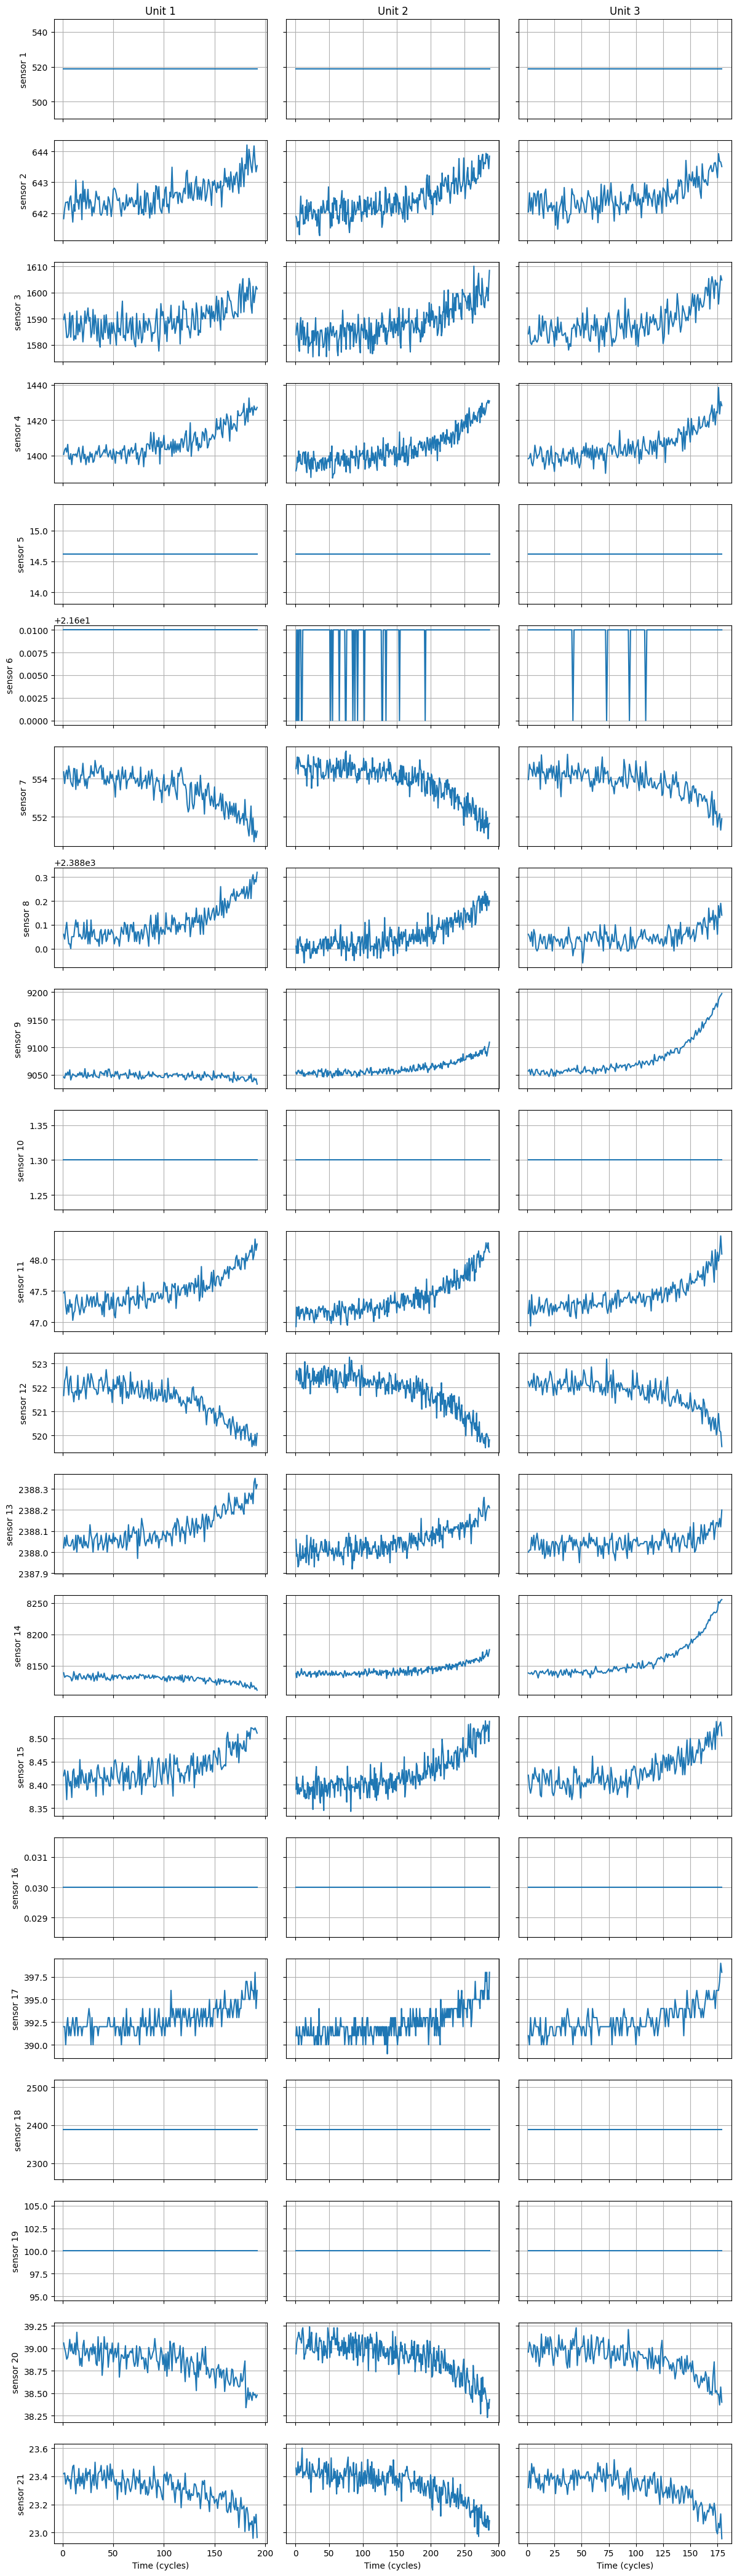

In [126]:
import matplotlib.pyplot as plt
import numpy as np  # needed for np.newaxis

def plot_units(units, indices):
    # Assume all units have the same sensor columns
    sensor_cols = [col for col in units[indices[0]].columns if "sensor measurement" in col]

    fig, axes = plt.subplots(
        nrows=len(sensor_cols), 
        ncols=len(indices), 
        figsize=(len(indices)*4, len(sensor_cols)*2),
        sharex='col', sharey='row'
    )

    # Handle case when there's only 1 row or col (matplotlib returns 1D array)
    if len(sensor_cols) == 1:
        axes = axes[np.newaxis, :]
    if len(indices) == 1:
        axes = axes[:, np.newaxis]

    for j, idx in enumerate(indices):
        unit = units[idx]
        for i, col in enumerate(sensor_cols):
            ax = axes[i, j]
            ax.plot(unit["time, in cycles"], unit[col])
            if j == 0:
                ax.set_ylabel(f"sensor {i+1}")
            if i == len(sensor_cols) - 1:
                ax.set_xlabel("Time (cycles)")
            if i == 0:  # Top row → add column title
                ax.set_title(f"Unit {idx}")
            ax.grid(True)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_units(units, [1, 2, 3])


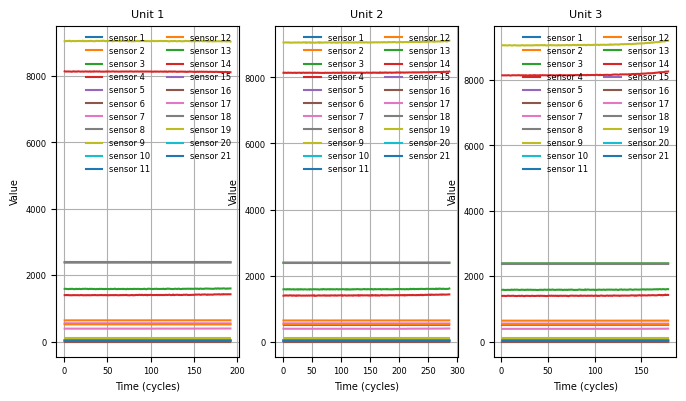

In [127]:
def plot_units_big(unit, ax, title=None):
    # Select only the sensor columns
    sensor_cols = [col for col in unit.columns if "sensor measurement" in col]

    for i, col in enumerate(sensor_cols):
        ax.plot(unit["time, in cycles"], unit[col], label=f"sensor {i+1}")

    if title:
        ax.set_title(title, fontsize=8, pad=6)  # small title, controlled padding
    ax.set_xlabel("Time (cycles)", fontsize=7, labelpad=4)
    ax.set_ylabel("Value", fontsize=7, labelpad=4)
    ax.tick_params(axis='both', labelsize=6)   # small tick labels
    ax.grid(True)
    ax.legend(fontsize=6, frameon=False, loc="upper right", ncol=2)


# --- Plot 3 units next to each other ---
fig, axes = plt.subplots(1, 3, figsize=(8, 4.3))  # A4 landscape in inches

for i, ax in enumerate(axes):
    unit_n = i+1
    plot_units_big(units[unit_n], ax=ax, title=f"Unit {unit_n}")

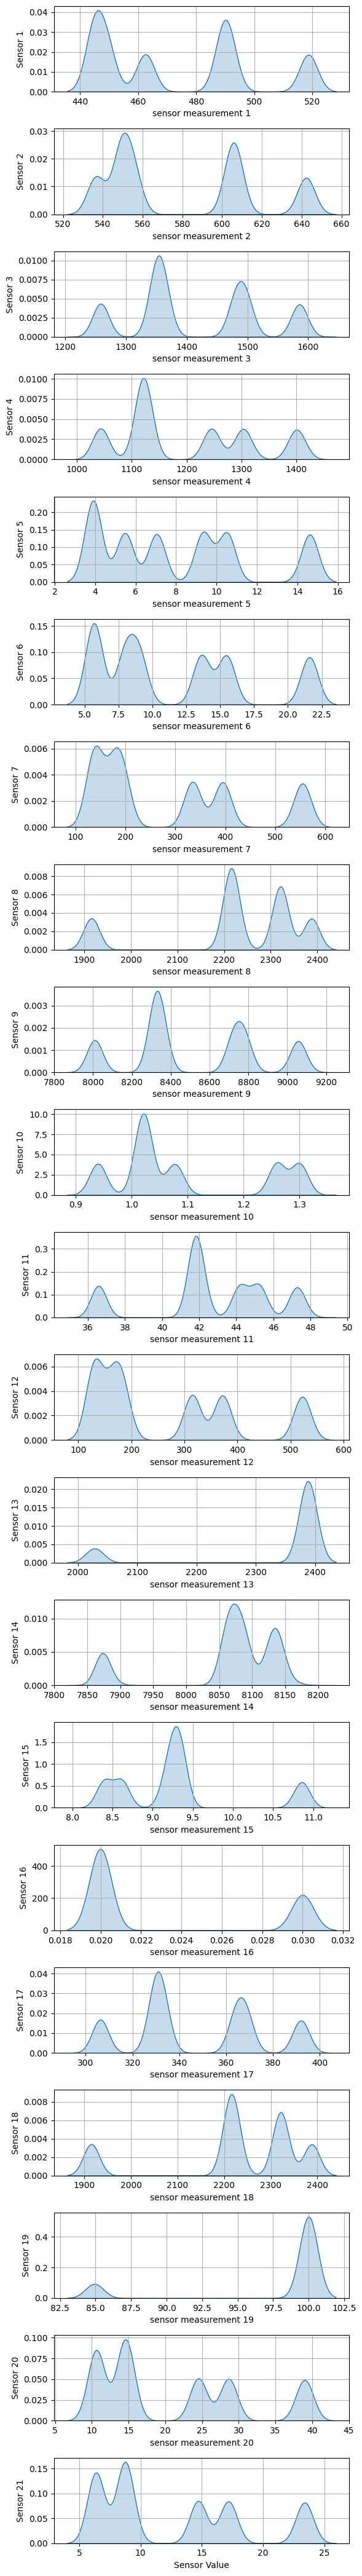

In [138]:
# Select only sensor columns
sensor_cols = [col for col in data.columns if "sensor measurement" in col]

fig, axes = plt.subplots(len(sensor_cols), 1, figsize=(6, 2*len(sensor_cols)))

for i, col in enumerate(sensor_cols):
    sns.kdeplot(data[col], ax=axes[i], fill=True)
    axes[i].set_ylabel(f"Sensor {i+1}")
    axes[i].grid(True)

axes[-1].set_xlabel("Sensor Value")
plt.tight_layout()
plt.show()